<a href="https://colab.research.google.com/github/sahoomrutyunjaya12345/TopicModellingonNewsArticle/blob/main/TopicModellingOnNewsArticle_CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Extraction/identification of major topics & themes discussed in news articles. 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member  -**   Mrutyunjaya Sahoo


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**In this project our task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.**

###**Data Description**

**The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
!pip install contractions
!pip install pyLDAvis  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 15.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 66.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are 

In [3]:
!pip install beautifulsoup4
!pip install nltk
!pip install wordcloud
!pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Python library used to scrape data from webpages
from bs4 import BeautifulSoup
# Module which provides regular expression matching operations
import re
# For string manipulation
import string
# Popular library to pre-process the text in NLP
import nltk
# Downloading stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
## Stopwords package from nltk
from nltk.corpus import stopwords
# Create interactive wordclouds
from wordcloud import WordCloud
# Ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# Mounting thr drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path = '/content/drive/MyDrive/AlmaBetter/NEWS POPULARITY PREDICTION CAPSTONE/bbc/'

In [7]:
news = []                                                                        ## Empty list for storing actual news in text       
topics = []                                                                      ## Empty list for new theme

In [8]:
Themes = ['business','entertainment','politics','sport','tech']  ## News themes 

In [9]:
for x in Themes:                                                                 ## For every item in Themes
    all_txt_files=sorted(os.listdir(path+x))                                     ## List all files present in given directory in sorted order
    for files in all_txt_files:                                                  ## For every item in txt_files
        txt_path=path + x + '/' + files                                          ## specifying exact path of every text news file
        with open(txt_path,'rb') as f:                                           ## open a text file
            text=f.read()                                                        ## read text file
        news.append(text)                                                        ## append text file which is our news, to empty news list
        topics.append(x)                                                         ## append the topic of news file to empty topics list

In [10]:
# Creating an empty dataframe
news_data = pd.DataFrame()  

In [11]:
# Adding both new column
news_data['News_text'] = news                                                    
news_data['News_Theme'] = topics  

news_data.head()
     

,News_text,News_Theme
0,b'Ad sales boost Time Warner profit\n\nQuarter...,business
1,b'Dollar gains on Greenspan speech\n\nThe doll...,business
2,b'Yukos unit buyer faces loan claim\n\nThe own...,business
3,b'High fuel prices hit BA\'s profits\n\nBritis...,business
4,"b""Pernod takeover talk lifts Domecq\n\nShares ...",business


In [12]:
# checking the last 5 dataset
news_data.tail()

,News_text,News_Theme
2220,b'BT program to beat dialler scams\n\nBT is in...,tech
2221,b'Spam e-mails tempt net shoppers\n\nComputer ...,tech
2222,b'Be careful how you code\n\nA new European di...,tech
2223,b'US cyber security chief resigns\n\nThe man m...,tech
2224,b'Losing yourself in online gaming\n\nOnline r...,tech


In [13]:
# Checking the dataset rows and colimns
news_data.shape

(2225, 2)

In [14]:
# Checking the columns of the dataset
news_data.columns

Index(['News_text', 'News_Theme'], dtype='object')

In [15]:
# Creating a copy of it
data_df = news_data.copy()

In [16]:
# Checking the info about dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   News_text   2225 non-null   object
 1   News_Theme  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [17]:
# checking the no. of duplicates in the dataset
data_df.duplicated().sum()

98

In [18]:
# dropping the duplicates
data_df.drop_duplicates(keep = 'first',inplace=True)
data_df.shape

(2127, 2)

In [19]:
# Checking the info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2127 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   News_text   2127 non-null   object
 1   News_Theme  2127 non-null   object
dtypes: object(2)
memory usage: 49.9+ KB


In [20]:
# Checking for missing/Null values
data_df.isnull().sum()

News_text     0
News_Theme    0
dtype: int64

In [21]:
# Checking the count,std,etc on variables
data_df.describe()

,News_text,News_Theme
count,2127,2127
unique,2127,5
top,b'Ad sales boost Time Warner profit\n\nQuarter...,sport
freq,1,505


In [22]:
# Checking the valuecounts of dataset
data= data_df['News_Theme'].value_counts()
data

sport            505
business         503
politics         403
entertainment    369
tech             347
Name: News_Theme, dtype: int64

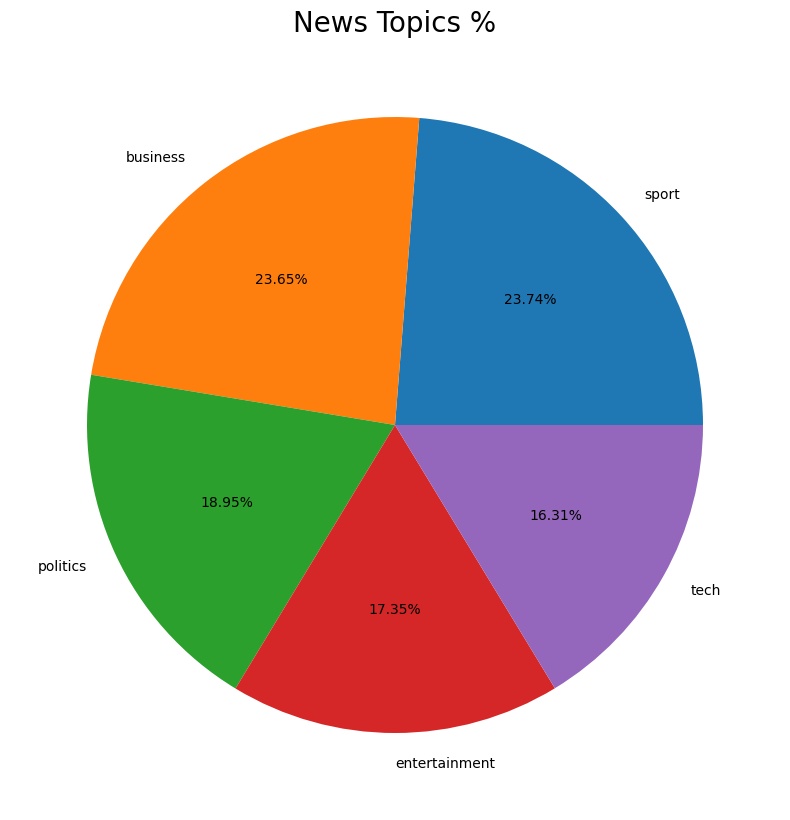

In [23]:
# understanding the different topic percentage through pie chart
plt.figure(figsize = (10,10))
plt.pie(data, autopct = '%0.2f%%' , labels = data.index)
plt.title('News Topics %', size = 20)
plt.show()

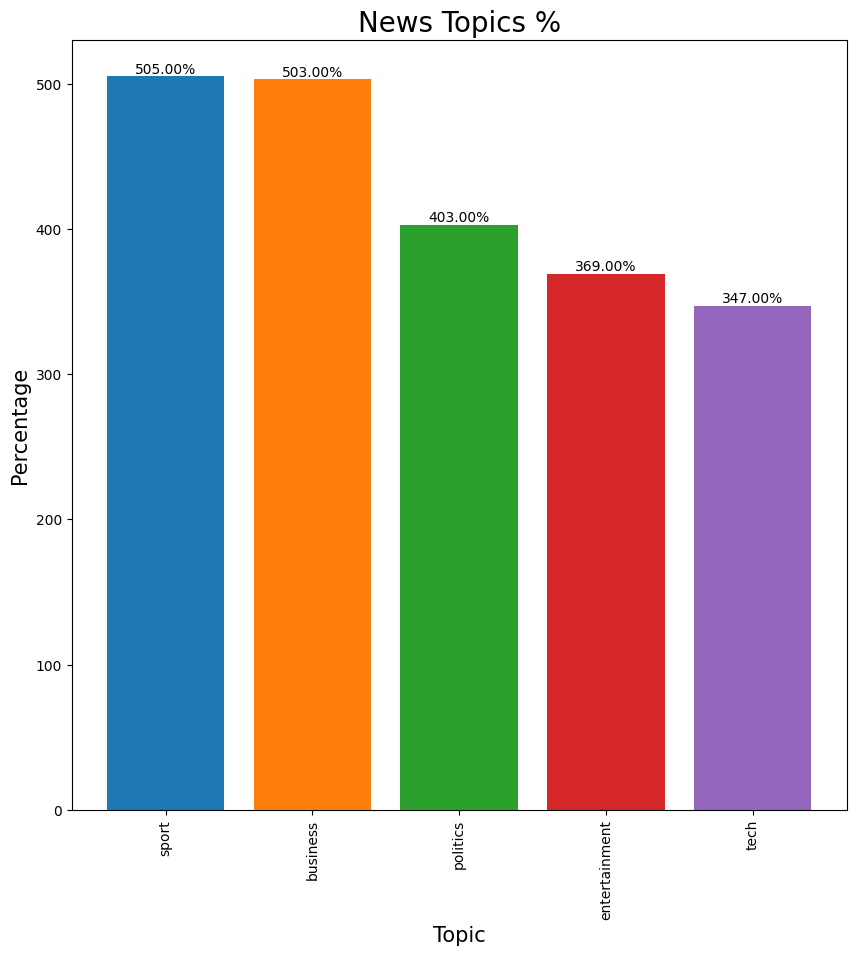

In [24]:
# understanding though bar plot
# define a list of colors for each topic
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(10, 10))
plt.bar(data.index, data.values, color=colors)
plt.title('News Topics %', size=20)
plt.xlabel('Topic', size=15)
plt.ylabel('Percentage', size=15)

# add value labels to the bars
for i, value in enumerate(data.values):
  plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()


## **NLP Text Processing**

In [25]:
# viewing the data in news_text column
data_df['News_text'][0]

b'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (\xc2\xa3600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will tr

In [26]:
 # Getting data from any html tags if present
data_df['News_text'] = [BeautifulSoup(k).get_text() for k in data_df['News_text'] ]

In [27]:
# Removing any urls present
data_df['News_text'] = [re.sub(r'https?://\S+|www\.\S+', '', k1) for k1 in data_df['News_text']]

In [28]:
# Checking the data after this processing
data_df['News_text']

0       Ad sales boost Time Warner profit\n\nQuarterly...
1       Dollar gains on Greenspan speech\n\nThe dollar...
2       Yukos unit buyer faces loan claim\n\nThe owner...
3       High fuel prices hit BA's profits\n\nBritish A...
4       Pernod takeover talk lifts Domecq\n\nShares in...
                              ...                        
2219    New consoles promise big problems\n\nMaking ga...
2220    BT program to beat dialler scams\n\nBT is intr...
2222    Be careful how you code\n\nA new European dire...
2223    US cyber security chief resigns\n\nThe man mak...
2224    Losing yourself in online gaming\n\nOnline rol...
Name: News_text, Length: 2127, dtype: object

In [29]:
data_df['News_text'][4]

"Pernod takeover talk lifts Domecq\n\nShares in UK drinks and food firm Allied Domecq have risen on speculation that it could be the target of a takeover by France's Pernod Ricard.\n\nReports in the Wall Street Journal and the Financial Times suggested that the French spirits firm is considering a bid, but has yet to contact its target. Allied Domecq shares in London rose 4% by 1200 GMT, while Pernod shares in Paris slipped 1.2%. Pernod said it was seeking acquisitions but refused to comment on specifics.\n\nPernod's last major purchase was a third of US giant Seagram in 2000, the move which propelled it into the global top three of drinks firms. The other two-thirds of Seagram was bought by market leader Diageo. In terms of market value, Pernod - at 7.5bn euros ($9.7bn) - is about 9% smaller than Allied Domecq, which has a capitalisation of Â£5.7bn ($10.7bn; 8.2bn euros). Last year Pernod tried to buy Glenmorangie, one of Scotland's premier whisky firms, but lost out to luxury goods f

**Removing Non-Word Characters**

In [30]:
# Replacing 'b\' character with ''
data_df['News_text']=[re.sub("b\' ","", k2) for k2 in data_df['News_text']]

In [31]:
data_df['News_text'][3]

'High fuel prices hit BA\'s profits\n\nBritish Airways has blamed high fuel prices for a 40% drop in profits.\n\nReporting its results for the three months to 31 December 2004, the airline made a pre-tax profit of £75m ($141m) compared with £125m a year earlier. Rod Eddington, BA\'s chief executive, said the results were "respectable" in a third quarter when fuel costs rose by £106m or 47.3%. BA\'s profits were still better than market expectation of £59m, and it expects a rise in full-year revenues.\n\nTo help offset the increased price of aviation fuel, BA last year introduced a fuel surcharge for passengers.\n\nIn October, it increased this from £6 to £10 one-way for all long-haul flights, while the short-haul surcharge was raised from £2.50 to £4 a leg. Yet aviation analyst Mike Powell of Dresdner Kleinwort Wasserstein says BA\'s estimated annual surcharge revenues - £160m - will still be way short of its additional fuel costs - a predicted extra £250m. Turnover for the quarter was

In [32]:
# Before cleaning ,so we checked how our data looks before nad after
news_data['News_text'][3]

b'High fuel prices hit BA\'s profits\n\nBritish Airways has blamed high fuel prices for a 40% drop in profits.\n\nReporting its results for the three months to 31 December 2004, the airline made a pre-tax profit of \xc2\xa375m ($141m) compared with \xc2\xa3125m a year earlier. Rod Eddington, BA\'s chief executive, said the results were "respectable" in a third quarter when fuel costs rose by \xc2\xa3106m or 47.3%. BA\'s profits were still better than market expectation of \xc2\xa359m, and it expects a rise in full-year revenues.\n\nTo help offset the increased price of aviation fuel, BA last year introduced a fuel surcharge for passengers.\n\nIn October, it increased this from \xc2\xa36 to \xc2\xa310 one-way for all long-haul flights, while the short-haul surcharge was raised from \xc2\xa32.50 to \xc2\xa34 a leg. Yet aviation analyst Mike Powell of Dresdner Kleinwort Wasserstein says BA\'s estimated annual surcharge revenues - \xc2\xa3160m - will still be way short of its additional fu

In [33]:
data_df['News_text'] = [re.sub(r"\\n\\n", " ",k3) for k3 in data_df['News_text']]             #Replacing other non-word characters
data_df['News_text'] = [re.sub(r"\\\'s", " ",k4) for k4 in data_df['News_text']] 
data_df['News_text'] = [re.sub(r"\\\'", " ", k5) for k5 in data_df['News_text']]
data_df['News_text'] = [re.sub(r"\\n\'", " ", k6) for k6 in data_df['News_text']]
data_df['News_text'] = [re.sub(r"\n\n", " ", k7) for k7 in data_df['News_text']]
data_df['News_text'] = [re.sub(r'\\xc2\\xa3','\xA3', k8) for k8 in data_df['News_text']]       # "\xA3" is unicode for symbol pound(£)   
data_df['News_text'] = [re.sub(r"\'s",'', k9) for k9 in data_df['News_text']] 
data_df['News_text'] = [re.sub(r'\\n"','', k10) for k10 in data_df['News_text']] 
data_df['News_text'] = [re.sub(r'b"','', k11) for k11 in data_df['News_text']] 
data_df['News_text'] = [re.sub(r'\n','', k12) for k12 in data_df['News_text']]

In [34]:
# Checking the data after removing
data_df['News_text'][5]

'Japan narrowly escapes recession Japan economy teetered on the brink of a technical recession in the three months to September, figures show. Revised figures indicated growth of just 0.1% - and a similar-sized contraction in the previous quarter. On an annual basis, the data suggests annual growth of just 0.2%, suggesting a much more hesitant recovery than had previously been thought. A common technical definition of a recession is two successive quarters of negative growth. The government was keen to play down the worrying implications of the data. "I maintain the view that Japan economy remains in a minor adjustment phase in an upward climb, and we will monitor developments carefully," said economy minister Heizo Takenaka. But in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead, observers were less sanguine. "It painting a picture of a recovery... much patchier than previously thought," said Paul Sheard, economi

In [35]:
# Checking the data before removing
news_data['News_text'][5]

b'Japan narrowly escapes recession\n\nJapan\'s economy teetered on the brink of a technical recession in the three months to September, figures show.\n\nRevised figures indicated growth of just 0.1% - and a similar-sized contraction in the previous quarter. On an annual basis, the data suggests annual growth of just 0.2%, suggesting a much more hesitant recovery than had previously been thought. A common technical definition of a recession is two successive quarters of negative growth.\n\nThe government was keen to play down the worrying implications of the data. "I maintain the view that Japan\'s economy remains in a minor adjustment phase in an upward climb, and we will monitor developments carefully," said economy minister Heizo Takenaka. But in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead, observers were less sanguine. "It\'s painting a picture of a recovery... much patchier than previously thought," said P

### Creating a function to remove punctuations

In [36]:
# Creating a function to remove punctuations from our dataset
def remove_punctuation(text):
  ''' a function to remove  punctuation '''
  import string # replacing the punctuations with no space which in effect deletes the punctuation marks 
  translator = str.maketrans('','',string.punctuation)
  return text.translate(translator)

In [37]:
data_df['News_text']=data_df['News_text'].apply(remove_punctuation)
data_df['News_text'][5]

'Japan narrowly escapes recession Japan economy teetered on the brink of a technical recession in the three months to September figures show Revised figures indicated growth of just 01  and a similarsized contraction in the previous quarter On an annual basis the data suggests annual growth of just 02 suggesting a much more hesitant recovery than had previously been thought A common technical definition of a recession is two successive quarters of negative growth The government was keen to play down the worrying implications of the data I maintain the view that Japan economy remains in a minor adjustment phase in an upward climb and we will monitor developments carefully said economy minister Heizo Takenaka But in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead observers were less sanguine It painting a picture of a recovery much patchier than previously thought said Paul Sheard economist at Lehman Brothers in Tok

lowercasing the dataset

In [38]:
data_df['News_text']=[l.lower() for l in data_df['News_text']]
data_df["News_text"][5]

'japan narrowly escapes recession japan economy teetered on the brink of a technical recession in the three months to september figures show revised figures indicated growth of just 01  and a similarsized contraction in the previous quarter on an annual basis the data suggests annual growth of just 02 suggesting a much more hesitant recovery than had previously been thought a common technical definition of a recession is two successive quarters of negative growth the government was keen to play down the worrying implications of the data i maintain the view that japan economy remains in a minor adjustment phase in an upward climb and we will monitor developments carefully said economy minister heizo takenaka but in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead observers were less sanguine it painting a picture of a recovery much patchier than previously thought said paul sheard economist at lehman brothers in tok

Removing the numbers if present in our dataset

In [39]:
data_df['News_text']=[re.sub(r'\d+','',d1) for d1 in data_df['News_text']]
data_df['News_text'][5]

'japan narrowly escapes recession japan economy teetered on the brink of a technical recession in the three months to september figures show revised figures indicated growth of just   and a similarsized contraction in the previous quarter on an annual basis the data suggests annual growth of just  suggesting a much more hesitant recovery than had previously been thought a common technical definition of a recession is two successive quarters of negative growth the government was keen to play down the worrying implications of the data i maintain the view that japan economy remains in a minor adjustment phase in an upward climb and we will monitor developments carefully said economy minister heizo takenaka but in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead observers were less sanguine it painting a picture of a recovery much patchier than previously thought said paul sheard economist at lehman brothers in tokyo i

## Removing stopwords

In [40]:
# Extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [41]:
# Creating a function to remove stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [42]:
# applying the function to our dataset
data_df['News_text'] = data_df['News_text'].apply(stopwords)
data_df.head()

,News_text,News_Theme
0,ad sales boost time warner profit quarterly pr...,business
1,dollar gains greenspan speech dollar hit highe...,business
2,yukos unit buyer faces loan claim owners embat...,business
3,high fuel prices hit ba profits british airway...,business
4,pernod takeover talk lifts domecq shares uk dr...,business


In [43]:
data_df['News_text'].head()

0    ad sales boost time warner profit quarterly pr...
1    dollar gains greenspan speech dollar hit highe...
2    yukos unit buyer faces loan claim owners embat...
3    high fuel prices hit ba profits british airway...
4    pernod takeover talk lifts domecq shares uk dr...
Name: News_text, dtype: object

In [44]:
# visualize the results
for i, text in enumerate(data_df['News_text'].head()):
    print(f'Original {i}: {text}')
    print(f'Filtered {i}: {stopwords(data_df["News_text"][i])}\n')

Original 0: ad sales boost time warner profit quarterly profits us media giant timewarner jumped bn â£m three months december yearearlier firm one biggest investors google benefited sales highspeed internet connections higher advert sales timewarner said fourth quarter sales rose bn bn profits buoyed oneoff gains offset profit dip warner bros less users aol time warner said friday owns searchengine google internet business aol mixed fortunes lost subscribers fourth quarter profits lower preceding three quarters however company said aol underlying profit exceptional items rose back stronger internet advertising revenues hopes increase subscribers offering online service free timewarner internet customers try sign aol existing customers highspeed broadband timewarner also restate results following probe us securities exchange commission sec close concluding time warner fourth quarter profits slightly better analysts expectations film division saw profits slump helped boxoffice flops alex

###Collect vocabulary count

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [46]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data_df['News_text'].astype(str))
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

Store the vocab and counts in a dataframe

In [47]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
  vocab.append(key)
  count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_counts = pd.Series(count, index=vocab)
# sort the dataframe
vocab_counts = vocab_counts.sort_values(ascending=False)

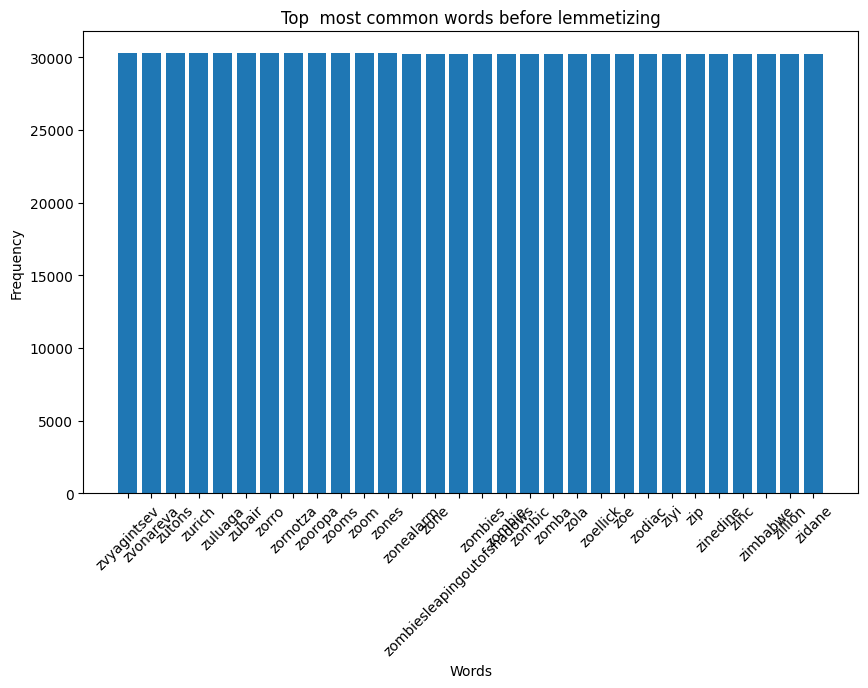

In [48]:
import matplotlib.pyplot as plt

# set the figure size
plt.figure(figsize=(10, 6))

# plot the bar chart
plt.bar(vocab_counts.index[:30], vocab_counts.values[:30])

# set the title and axis labels
plt.title('Top  most common words before lemmetizing')
plt.xlabel('Words')
plt.ylabel('Frequency')

# rotate x-axis labels for better readability
plt.xticks(rotation=45)

# display the plot
plt.show()


##Lemmatization

In [49]:
lemmatizer = WordNetLemmatizer() 

In [50]:
# creating a function for lemmatization
def lemmatize_word(news):
  text = [lemmatizer.lemmatize(word) for word in news.split()]
  return text

In [51]:
# applying this function to our dataset
data_df['News_text']=data_df['News_text'].apply(lemmatize_word)
data_df['News_text'].head()

0    [ad, sale, boost, time, warner, profit, quarte...
1    [dollar, gain, greenspan, speech, dollar, hit,...
2    [yukos, unit, buyer, face, loan, claim, owner,...
3    [high, fuel, price, hit, ba, profit, british, ...
4    [pernod, takeover, talk, lift, domecq, share, ...
Name: News_text, dtype: object

In [52]:
data_df['News_text'][6]

['job',
 'growth',
 'still',
 'slow',
 'u',
 'u',
 'created',
 'fewer',
 'job',
 'expected',
 'january',
 'fall',
 'jobseekers',
 'pushed',
 'unemployment',
 'rate',
 'lowest',
 'level',
 'three',
 'year',
 'according',
 'labor',
 'department',
 'figure',
 'u',
 'firm',
 'added',
 'job',
 'january',
 'gain',
 'nonfarm',
 'payroll',
 'market',
 'expectation',
 'new',
 'job',
 'nevertheless',
 'enough',
 'push',
 'unemployment',
 'rate',
 'lowest',
 'level',
 'since',
 'september',
 'job',
 'gain',
 'mean',
 'president',
 'bush',
 'celebrate',
 'albeit',
 'fine',
 'margin',
 'net',
 'growth',
 'job',
 'u',
 'economy',
 'first',
 'term',
 'office',
 'presided',
 'net',
 'fall',
 'job',
 'last',
 'november',
 'presidential',
 'election',
 'first',
 'president',
 'since',
 'herbert',
 'hoover',
 'result',
 'job',
 'creation',
 'became',
 'key',
 'issue',
 'last',
 'year',
 'election',
 'however',
 'adding',
 'december',
 'january',
 'figure',
 'administration',
 'first',
 'term',
 'job',
 '

In [53]:
data_df.head()

,News_text,News_Theme
0,"[ad, sale, boost, time, warner, profit, quarte...",business
1,"[dollar, gain, greenspan, speech, dollar, hit,...",business
2,"[yukos, unit, buyer, face, loan, claim, owner,...",business
3,"[high, fuel, price, hit, ba, profit, british, ...",business
4,"[pernod, takeover, talk, lift, domecq, share, ...",business


### Top words after Lemmetization operation

In [54]:
# COLLECT VOCABULARY COUNT
# create the object of tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english")

# fit the vectorizer using the text data
tfidf_vectorizer.fit(data_df['News_text'].astype(str))

# collect the vocabulary items used in the vectorizer
dictionary = tfidf_vectorizer.vocabulary_.items()


In [58]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_Lemm= pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_Lemm = vocab_after_Lemm.sort_values(ascending=False)

In [59]:
vocab_after_Lemm

zvyagintsev    27074
zvonareva      27073
zutons         27072
zurich         27071
zuluaga        27070
               ...  
aaliyah            4
aadc               3
aac                2
aaa                1
aa                 0
Length: 27075, dtype: int64

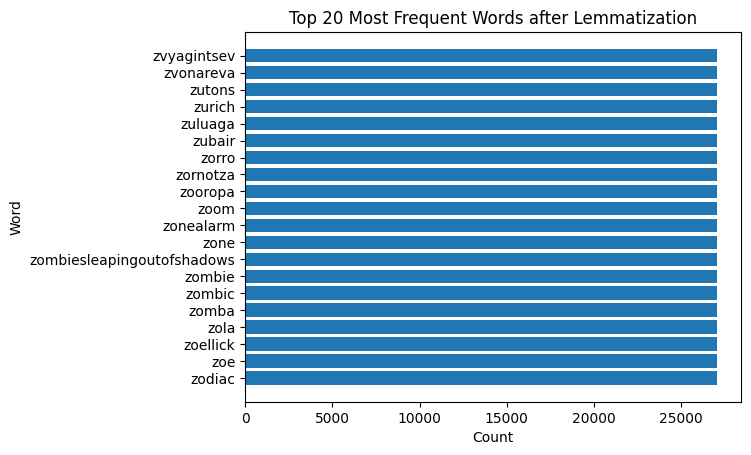

In [65]:
import matplotlib.pyplot as plt

# create a horizontal bar plot
plt.barh(vocab_after_Lemm.index[:20], vocab_after_Lemm.values[:20])
plt.gca().invert_yaxis() # invert y-axis to show the most frequent words on top
plt.title('Top 20 Most Frequent Words after Lemmatization')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()


In [70]:
# Creating a function length
def length(text):
  '''a function which returns the length of text'''
  return len(text)

In [72]:
# applying to our dataset
data_df['length'] = data_df['News_text'].apply(length)
data_df.head(10)

,News_text,News_Theme,length
0,"[ad, sale, boost, time, warner, profit, quarte...",business,240
1,"[dollar, gain, greenspan, speech, dollar, hit,...",business,226
2,"[yukos, unit, buyer, face, loan, claim, owner,...",business,157
3,"[high, fuel, price, hit, ba, profit, british, ...",business,247
4,"[pernod, takeover, talk, lift, domecq, share, ...",business,163
5,"[japan, narrowly, escape, recession, japan, ec...",business,109
6,"[job, growth, still, slow, u, u, created, fewe...",business,166
7,"[india, call, fair, trade, rule, india, attend...",business,188
8,"[ethiopia, crop, production, ethiopia, produce...",business,137
9,"[court, reject, bn, tobacco, case, u, governme...",business,134


In [73]:
data_df.columns

Index(['News_text', 'News_Theme', 'length'], dtype='object')

In [74]:
# Storing the different news_theme in different variable
Business_data = data_df[data_df['News_Theme'] == 'business']
Entertainment_data = data_df[data_df['News_Theme'] == 'entertainment']
Politics_data = data_df[data_df['News_Theme'] == 'politics']
Sport_data = data_df[data_df['News_Theme'] == 'sport']
Tech_data = data_df[data_df['News_Theme'] == 'tech']

In [75]:
Business_data

,News_text,News_Theme,length
0,"[ad, sale, boost, time, warner, profit, quarte...",business,240
1,"[dollar, gain, greenspan, speech, dollar, hit,...",business,226
2,"[yukos, unit, buyer, face, loan, claim, owner,...",business,157
3,"[high, fuel, price, hit, ba, profit, british, ...",business,247
4,"[pernod, takeover, talk, lift, domecq, share, ...",business,163
...,...,...,...
505,"[trial, begin, spain, top, banker, trial, emil...",business,161
506,"[uk, economy, end, year, spurt, uk, economy, g...",business,261
507,"[healthsouth, exboss, go, trial, former, head,...",business,131
508,"[euro, firm, miss, optimism, large, company, a...",business,238


In [76]:
Tech_data

,News_text,News_Theme,length
1824,"[ink, help, drive, democracy, asia, kyrgyz, re...",tech,370
1825,"[china, net, cafe, culture, crackdown, chinese...",tech,213
1826,"[microsoft, seeking, spyware, trojan, microsof...",tech,128
1827,"[digital, guru, float, sub, pc, nicholas, negr...",tech,241
1828,"[technology, get, creative, bug, hitech, art, ...",tech,425
...,...,...,...
2219,"[new, console, promise, big, problem, making, ...",tech,608
2220,"[bt, program, beat, dialler, scam, bt, introdu...",tech,243
2222,"[careful, code, new, european, directive, coul...",tech,537
2223,"[u, cyber, security, chief, resigns, man, maki...",tech,220


In [87]:
Entertainment_data

,News_text,News_Theme,length
510,"[gallery, unveils, interactive, tree, christma...",entertainment,105
511,"[jarre, join, fairytale, celebration, french, ...",entertainment,161
512,"[musical, treatment, capra, film, classic, fil...",entertainment,109
513,"[richard, judy, choose, top, book, author, sho...",entertainment,129
514,"[poppins, musical, get, flying, start, stage, ...",entertainment,115
...,...,...,...
891,"[last, star, war, child, sixth, final, star, w...",entertainment,126
892,"[french, honour, director, parker, british, fi...",entertainment,133
893,"[robot, march, u, cinema, summit, animated, mo...",entertainment,166
894,"[hobbit, picture, four, year, away, lord, ring...",entertainment,148
